In [1]:
import numpy as np

import pandas as pd

In [2]:
dataset = pd.read_csv('train.csv')

In [3]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
dataset.shape

(1460, 81)

In [7]:
dataset_numerical_features = [col for col in dataset.columns if dataset[col].dtype == 'float64'] 

dataset_numerical_features

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [8]:
dataset_numerical_features.remove('LotFrontage')

In [9]:
dataset_numerical_features

['MasVnrArea', 'GarageYrBlt']

In [10]:
dataset_numerical_features.remove('MasVnrArea')

In [11]:
dataset_numerical_features

['GarageYrBlt']

In [12]:
numerical_features_datset = dataset[dataset_numerical_features]

In [13]:
numerical_features_datset.head()

,GarageYrBlt
0,2003.0
1,1976.0
2,2001.0
3,1998.0
4,2000.0


In [14]:
numerical_features_datset.isnull().sum()

GarageYrBlt    81
dtype: int64

In [15]:
for col in dataset_numerical_features:
    numerical_features_datset[col] = numerical_features_datset[col].fillna(numerical_features_datset[col].median())

<ipython-input-15-f0d443db3e0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_features_datset[col] = numerical_features_datset[col].fillna(numerical_features_datset[col].median())


In [16]:
numerical_features_datset.isnull().sum()

GarageYrBlt    0
dtype: int64

In [17]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

min_max_scaler.fit(numerical_features_datset)

MinMaxScaler()

In [18]:
dataset_scaled = pd.DataFrame(min_max_scaler.transform(numerical_features_datset))

dataset_scaled.columns = dataset_numerical_features

In [19]:
dataset_scaled.describe()

,GarageYrBlt
count,1460.000000
mean,0.714446
std,0.218155
min,0.000000
25%,0.563636
50%,0.727273
75%,0.918182
max,1.000000


In [20]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(dataset_scaled)



PCA()

In [21]:
print(pca.components_)

[[-1.]]


In [22]:
print(pca.components_.shape)

(1, 1)


In [23]:
print(type(pca.components_))

<class 'numpy.ndarray'>


In [24]:
print(pca.explained_variance_)

[0.04759149]


In [25]:
print(len(pca.explained_variance_))

1


In [26]:
print(pca.mean_)

[0.71444583]


In [27]:
print(pca.noise_variance_)

0.0


In [28]:
principal_components = pca.fit_transform(dataset_scaled)

print(type(principal_components))
print(principal_components.shape)

principal_components_df = pd.DataFrame(principal_components)

<class 'numpy.ndarray'>
(1460, 1)


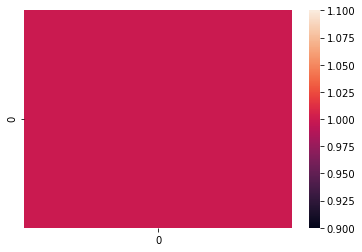

In [29]:
import seaborn as sns

sns.heatmap(principal_components_df.corr())

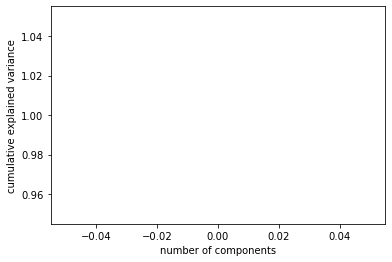

In [30]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [33]:
pca_low_dim = PCA(n_components = 0)

In [34]:
pca_low_dim.fit(dataset_scaled)

PCA(n_components=0)

In [35]:
print(dataset_scaled.shape)

print(pca_low_dim.transform(dataset_scaled).shape)

(1460, 1)
(1460, 0)


In [36]:
print(pca_low_dim.explained_variance_)

[]


In [37]:
print(pca_low_dim.explained_variance_.sum())

0.0
